In [14]:
import sys
sys.path.append('waveglow/')

import numpy as np
import torch
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

from hparams import create_hparams
from model import Tacotron2
from train import load_model, load_checkpoint
from text import text_to_sequence
from audio_processing import griffin_lim

In [15]:
def plot_data(data, figsize=(16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none')

In [16]:
hparams = create_hparams()

## Load model from training checkpoint

In [17]:
# tacotron2
iteration = 14000
checkpoint_path = './training/checkpoint_{}'.format(iteration)
model = load_model(hparams)
model, _, _, _ = load_checkpoint(checkpoint_path, model)
_ = model.cuda().eval().half()

Loading checkpoint './training/checkpoint_14000'
Loaded checkpoint './training/checkpoint_14000' from iteration 14000


In [22]:
# waveglow
waveglow_path = './pretrain_model/waveglow_256channels.pt'
waveglow = torch.load(waveglow_path)['model']
_ = waveglow.cuda().eval().half()
for k in waveglow.convinv:
    k.float()

/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


## Prepare text input

In [19]:
text = "中文维基百科成立于2002年10月24日"
sequence = np.array(text_to_sequence(text, ['transliteration_cleaners']))[None, :]
sequence = torch.autograd.Variable(torch.from_numpy(sequence).cuda().long())

Warning! Reached max decoder steps


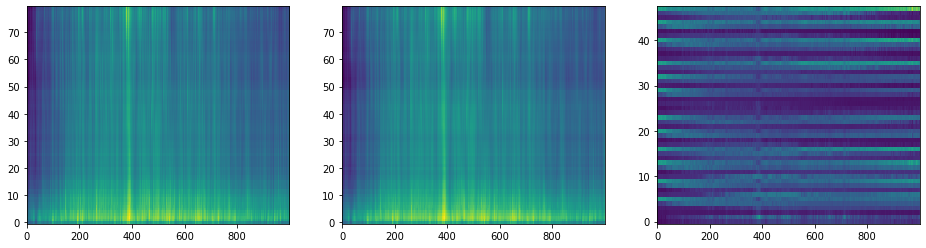

In [20]:
mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
plot_data((mel_outputs.float().data.cpu().numpy()[0],
           mel_outputs_postnet.float().data.cpu().numpy()[0],
           alignments.float().data.cpu().numpy()[0].T))

## Synthesize audio from spectrogram using WaveGlow

In [24]:
with torch.no_grad():
    audio = waveglow.infer(mel_outputs_postnet, sigma=0.666)
ipd.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate)

/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use t

/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/lokhiufung/miniconda3/envs/pytorch-1.3/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use t